In [17]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pickle

In [2]:
data = pd.read_csv('Prostate_cancer_data.csv',index_col=0)

In [3]:
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,,
1,M,23,12,151,954,0.143,0.278,0.242,0.079
2,B,9,13,133,1326,0.143,0.079,0.181,0.057
3,M,21,27,130,1203,0.125,0.160,0.207,0.060
4,M,14,16,78,386,0.070,0.284,0.260,0.097
5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.8+ KB


In [5]:
new_df=pd.get_dummies(data,columns=['diagnosis_result'],drop_first=True)

In [6]:
new_df.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
id,,,,,,,,,
1,23,12,151,954,0.143,0.278,0.242,0.079,1
2,9,13,133,1326,0.143,0.079,0.181,0.057,0
3,21,27,130,1203,0.125,0.160,0.207,0.060,1
4,14,16,78,386,0.070,0.284,0.260,0.097,1
5,9,19,135,1297,0.141,0.133,0.181,0.059,1


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(new_df.drop('diagnosis_result_M',axis=1))
#removing the last column of the dataframe as this table will be used for the feature matrix
scaled_features=scaler.transform(new_df.drop('diagnosis_result_M',axis=1))
new_data=pd.DataFrame(scaled_features,columns=new_df.columns[:-1])

In [8]:
#feature matrix
X=new_data

In [9]:
#target matrix
y=new_df['diagnosis_result_M']
from sklearn.model_selection import train_test_split
#allocating 33% of the dataset for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# random value of n_neighbors, we will find a better value of k later.
knn = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
pred=knn.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.79      0.83      0.81        18

    accuracy                           0.79        33
   macro avg       0.79      0.78      0.78        33
weighted avg       0.79      0.79      0.79        33



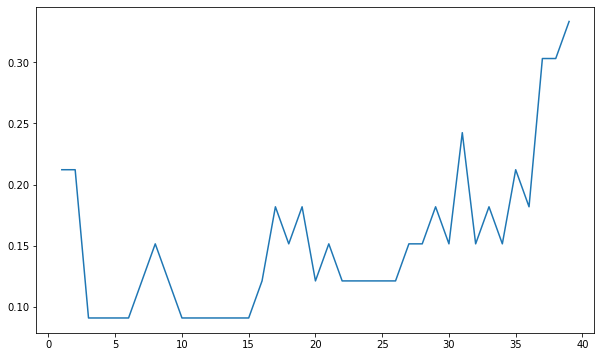

In [14]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

In [15]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [16]:
new_pred=knn.predict(X_test)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.86      1.00      0.92        18

    accuracy                           0.91        33
   macro avg       0.93      0.90      0.91        33
weighted avg       0.92      0.91      0.91        33



In [19]:
pickle.dump(knn,open("model.pkl","wb"))
model = pickle.load(open('model.pkl','rb'))